<a href="https://colab.research.google.com/github/kurasaiteja/Whatsapp-Analysis/blob/master/Whatsapp_Group_Chat_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Whatsapp Chat Data Analysis

Steps to import chat
1. Open Whatsapp chat.
2. Go to Settings.
3. Click on Export Chat.
4. Click on without media.
5. Send it your computer over email

In [1]:
import re
import regex
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
import datetime
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
% matplotlib inline

# **Data Preparation:**

A chunk from a chat would look like the following in the text file:

20/06/21, 10:00 PM - Anmol: How are you?

Bassically every chat follows the follwoing format

{Date}, {Time} - {Author}: {Message}


In [2]:
def startsWithDateAndTimeAndroid(s):
    print(s)
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -' 
    result = re.match(pattern, s)
    if result:
        return True
    return False

def startsWithDateAndTimeios(s):
    pattern = '^\[([0-9]+)([\/-])([0-9]+)([\/-])([0-9]+)[,]? ([0-9]+):([0-9][0-9]):([0-9][0-9])?[ ]?(AM|PM|am|pm)?\]' 
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [3]:
def FindAuthor(s):
  s=s.split(":")
  if len(s)==2:
    return True
  else:
    return False

In [4]:
def getDataPointAndroid(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(':') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

def getDataPointios(line):
	splitLine = line.split('] ')
	dateTime = splitLine[0]
	if ',' in dateTime:
		date, time = dateTime.split(',')
	else:
		date, time = dateTime.split(' ')
	message = ' '.join(splitLine[1:])
	if FindAuthor(message):
		splitMessage = message.split(':')
		author = splitMessage[0]
		message = ' '.join(splitMessage[1:])
	else:
		author = None
	if time[5]==":":
		time = time[:5]+time[-3:]
	else:
		if 'AM' in time or 'PM' in time:
			time = time[:6]+time[-3:]
		else:
			time = time[:6]
	return date, time, author, message


If you get a **Value Error** after running the below cell , it may be due to different format of date.

Try replacing %d-%m-%Y with %m-%d-%Y and replacing %d-%m-%y with %m-%d-%y and similarly for / too.

In [5]:
def dateconv(date):
  year=''
  if '-' in date:
    year = date.split('-')[2]
    if len(year) == 4:
      return datetime.datetime.strptime(date, "[%d-%m-%Y").strftime("%Y-%m-%d")
    elif len(year) ==2:
      return datetime.datetime.strptime(date, "[%d-%m-%y").strftime("%Y-%m-%d")
  elif '/' in date:
    year = date.split('/')[2]
    if len(year) == 4:
      return datetime.datetime.strptime(date, "[%d/%m/%Y").strftime("%Y-%m-%d")
    if len(year) ==2:
      return datetime.datetime.strptime(date, "[%d/%m/%y").strftime("%Y-%m-%d")

In [6]:
def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

Change file path in the below cell

In [7]:
filePath = 'C:/Users/91779/Desktop/spam.txt'

In [8]:
parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
conversationPath =  filePath
with open(conversationPath, encoding="utf-8") as fp:
    device=''
    first=fp.readline()
    print(first)
    if '[' in first:
      device='ios'
    else:
      device="android"
    fp.readline() 
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        if device=="ios":
          line = line.strip()
          if startsWithDateAndTimeios(line):
            if len(messageBuffer) > 0:
              parsedData.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDataPointios(line)
            messageBuffer.append(message)
          else:
            line= (line.encode('ascii', 'ignore')).decode("utf-8")
            if startsWithDateAndTimeios(line):
              if len(messageBuffer) > 0:
                parsedData.append([date, time, author, ' '.join(messageBuffer)])
              messageBuffer.clear()
              date, time, author, message = getDataPointios(line)
              messageBuffer.append(message)
            else:
              messageBuffer.append(line)
        else:
          line = line.strip()
          print(line)
          if startsWithDateAndTimeAndroid(line):
            print('line')
            if len(messageBuffer) > 0:
              parsedData.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDataPointAndroid(line)
            messageBuffer.append(message)
          else:
            messageBuffer.append(line)

4/25/21, 7:27 PM - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.

4/25/21, 7:27 PM - You joined using this group's invite link
4/25/21, 7:27 PM - You joined using this group's invite link
line
4/25/21, 7:31 PM - +91 77679 46485 joined using this group's invite link
4/25/21, 7:31 PM - +91 77679 46485 joined using this group's invite link
line
4/25/21, 7:32 PM - +91 99627 90608 joined using this group's invite link
4/25/21, 7:32 PM - +91 99627 90608 joined using this group's invite link
line
4/25/21, 7:33 PM - +91 8340 823 851 joined using this group's invite link
4/25/21, 7:33 PM - +91 8340 823 851 joined using this group's invite link
line
4/25/21, 7:34 PM - +91 90299 88228 joined using this group's invite link
4/25/21, 7:34 PM - +91 90299 88228 joined using this group's invite link
line
4/25/21, 7:34 PM - Anuja MSIS joined using this group's invite link
4/25/21, 7:34 PM - Anuja MSIS joined us

line
4/30/21, 10:22 PM - +1 (301) 256-6337: Yeah same 😂
4/30/21, 10:22 PM - +1 (301) 256-6337: Yeah same 😂
line
4/30/21, 10:22 PM - +91 95943 28719: Abd bhi gaya😢
4/30/21, 10:22 PM - +91 95943 28719: Abd bhi gaya😢
line
4/30/21, 10:22 PM - Pratik UMCP: Harpreet living his dream🔥❤️
4/30/21, 10:22 PM - Pratik UMCP: Harpreet living his dream🔥❤️
line
4/30/21, 10:23 PM - +91 90299 88228: F
4/30/21, 10:23 PM - +91 90299 88228: F
line
4/30/21, 10:23 PM - +91 97914 45413: Kuch jada he hogya😂
4/30/21, 10:23 PM - +91 97914 45413: Kuch jada he hogya😂
line
4/30/21, 10:23 PM - +91 77382 45193: Rcb hai! Haaregi hi 😂
4/30/21, 10:23 PM - +91 77382 45193: Rcb hai! Haaregi hi 😂
line
4/30/21, 10:24 PM - +91 91670 78959: 😂🔥
4/30/21, 10:24 PM - +91 91670 78959: 😂🔥
line
4/30/21, 10:24 PM - +91 95943 28719: Only Chahal can win it for HaarCB now🤣
4/30/21, 10:24 PM - +91 95943 28719: Only Chahal can win it for HaarCB now🤣
line
4/30/21, 10:25 PM - +91 88306 65866: that guy will score at SR 600
4/30/21, 10:25 PM 

5/3/21, 8:11 PM - Harsha Walvekar UMCP: AAj to had hi kar di humne
line
5/3/21, 8:11 PM - +91 81940 33006: Flatmate dhundh do mere liye 😭😭😭
5/3/21, 8:11 PM - +91 81940 33006: Flatmate dhundh do mere liye 😭😭😭
line
5/3/21, 8:11 PM - Harsha Walvekar UMCP: 🤭 But I am not coming for PhD
5/3/21, 8:11 PM - Harsha Walvekar UMCP: 🤭 But I am not coming for PhD
line
5/3/21, 8:11 PM - Harsha Walvekar UMCP: Kaisa chahiye
5/3/21, 8:11 PM - Harsha Walvekar UMCP: Kaisa chahiye
line
5/3/21, 8:11 PM - +1 (240) 825-7455: Arey tum log ne banaya tha na form. Uska kya hua ?
5/3/21, 8:11 PM - +1 (240) 825-7455: Arey tum log ne banaya tha na form. Uska kya hua ?
line
5/3/21, 8:12 PM - +91 90369 10695: Hai abhi bhi
5/3/21, 8:12 PM - +91 90369 10695: Hai abhi bhi
line
5/3/21, 8:12 PM - +1 (240) 825-7455: Arey kya yrr business kero toh bada vala business kero 🤭
5/3/21, 8:12 PM - +1 (240) 825-7455: Arey kya yrr business kero toh bada vala business kero 🤭
line
5/3/21, 8:12 PM - +91 81940 33006: Not from my course


5/3/21, 9:52 PM - +91 98334 72008: Har hafte chahie chart merko spam chart
line
5/3/21, 9:53 PM - Harsha Walvekar UMCP: I know that! Pura confidence hai!
5/3/21, 9:53 PM - Harsha Walvekar UMCP: I know that! Pura confidence hai!
line
5/3/21, 9:53 PM - +91 98334 72008: Jai Maharashtra
5/3/21, 9:53 PM - +91 98334 72008: Jai Maharashtra
line
5/3/21, 9:53 PM - Murtaza MSIS: Dusre darr jayenge bola tha, mai nahi jaa raha kahi😏
5/3/21, 9:53 PM - Murtaza MSIS: Dusre darr jayenge bola tha, mai nahi jaa raha kahi😏
line
5/3/21, 9:53 PM - Harsha Walvekar UMCP: Usme tera hi naam ayega sabse zada
5/3/21, 9:53 PM - Harsha Walvekar UMCP: Usme tera hi naam ayega sabse zada
line
5/3/21, 9:53 PM - +91 81940 33006: Send some 😂
5/3/21, 9:53 PM - +91 81940 33006: Send some 😂
line
5/3/21, 9:53 PM - +91 93232 55661: *Me trying to figure out yeh spam me chal kya raha hai , join kaha se karna hai😂😂
5/3/21, 9:53 PM - +91 93232 55661: *Me trying to figure out yeh spam me chal kya raha hai , join kaha se karna hai

5/3/21, 10:59 PM - Rishabh Mukund UMCP: So @919833472008
line


Did you actually get an admission at UMD or you're just here to spam? :p
Did you actually get an admission at UMD or you're just here to spam? :p
5/3/21, 10:59 PM - +91 81940 33006: 😂😂😂
5/3/21, 10:59 PM - +91 81940 33006: 😂😂😂
line


Deadd
Deadd
5/3/21, 10:59 PM - +91 98334 72008: Yassssss⛹🏻‍♀️
5/3/21, 10:59 PM - +91 98334 72008: Yassssss⛹🏻‍♀️
line
5/3/21, 11:00 PM - +1 (240) 825-7455: Lol tell your story
5/3/21, 11:00 PM - +1 (240) 825-7455: Lol tell your story
line
5/3/21, 11:00 PM - +91 90369 10695: Goood question
5/3/21, 11:00 PM - +91 90369 10695: Goood question
line
5/3/21, 11:00 PM - +1 (571) 426-6204: @919833472008 is bored 😑
5/3/21, 11:00 PM - +1 (571) 426-6204: @919833472008 is bored 😑
line
5/3/21, 11:00 PM - Harsha Walvekar UMCP: 😂
5/3/21, 11:00 PM - Harsha Walvekar UMCP: 😂
line
5/3/21, 11:00 PM - +91 98334 72008: Dude northwestern group se jay ka pm agaya
5/3/21, 11:00 PM - +91 98334 72008: Dude northwestern gro

5/4/21, 12:39 AM - Rishabh Mukund UMCP: And informative charts on word counts and no of emojis used 😂
line
5/4/21, 12:39 AM - +1 (240) 825-7455: Please do that, she will bring people here
5/4/21, 12:39 AM - +1 (240) 825-7455: Please do that, she will bring people here
line
5/4/21, 12:39 AM - +91 81940 33006: Enrolled 2 vaale bohot seedhe hain sab, koi spam ni hota vaha
5/4/21, 12:39 AM - +91 81940 33006: Enrolled 2 vaale bohot seedhe hain sab, koi spam ni hota vaha
line
5/4/21, 12:39 AM - Rishabh Mukund UMCP: 😂😂😂
5/4/21, 12:39 AM - Rishabh Mukund UMCP: 😂😂😂
line
5/4/21, 12:39 AM - +1 (240) 825-7455: Yes that's the whole point, learning with fun
5/4/21, 12:39 AM - +1 (240) 825-7455: Yes that's the whole point, learning with fun
line
5/4/21, 12:39 AM - +91 90369 10695: They don’t know their power yet
5/4/21, 12:39 AM - +91 90369 10695: They don’t know their power yet
line
5/4/21, 12:39 AM - Rishabh Mukund UMCP: White hat jr ka moto? 😂
5/4/21, 12:39 AM - Rishabh Mukund UMCP: White hat jr k

5/4/21, 9:57 PM - Harsha Walvekar UMCP: yeah man!
5/4/21, 9:57 PM - Harsha Walvekar UMCP: yeah man!
line
5/4/21, 9:57 PM - +91 97914 45413: 😂😂😂😂😂
5/4/21, 9:57 PM - +91 97914 45413: 😂😂😂😂😂
line
5/4/21, 9:57 PM - +91 97914 45413: Aaage ka bol @918050651307
5/4/21, 9:57 PM - +91 97914 45413: Aaage ka bol @918050651307
line
5/4/21, 9:57 PM - +91 98334 72008: @917795124477 funny msgs ka bhi rank hoga kya? 🙂
5/4/21, 9:57 PM - +91 98334 72008: @917795124477 funny msgs ka bhi rank hoga kya? 🙂
line
5/4/21, 9:58 PM - +91 90369 10695: 😂🙌🏼🙌🏼🙌🏼
5/4/21, 9:58 PM - +91 90369 10695: 😂🙌🏼🙌🏼🙌🏼
line
5/4/21, 9:58 PM - Harsha Walvekar UMCP: 😂😂
5/4/21, 9:58 PM - Harsha Walvekar UMCP: 😂😂
line
5/4/21, 9:58 PM - Murtaza MSIS: Spamming dundies night organize kar hi dete hai
5/4/21, 9:58 PM - Murtaza MSIS: Spamming dundies night organize kar hi dete hai
line
5/4/21, 9:59 PM - Anmol Goel: No major changes. I'll post around 11. 1 hour to go..........
5/4/21, 9:59 PM - Anmol Goel: No major changes. I'll post around 11

In [9]:
parsedData

[['4/25/21', '7:27 PM', None, "You joined using this group's invite link"],
 ['4/25/21',
  '7:31 PM',
  None,
  "+91 77679 46485 joined using this group's invite link"],
 ['4/25/21',
  '7:32 PM',
  None,
  "+91 99627 90608 joined using this group's invite link"],
 ['4/25/21',
  '7:33 PM',
  None,
  "+91 8340 823 851 joined using this group's invite link"],
 ['4/25/21',
  '7:34 PM',
  None,
  "+91 90299 88228 joined using this group's invite link"],
 ['4/25/21',
  '7:34 PM',
  None,
  "Anuja MSIS joined using this group's invite link"],
 ['4/25/21',
  '7:36 PM',
  None,
  "Murtaza MSIS joined using this group's invite link"],
 ['4/25/21',
  '7:40 PM',
  None,
  "+91 88011 27449 joined using this group's invite link"],
 ['4/25/21',
  '7:41 PM',
  None,
  "+91 99325 04585 joined using this group's invite link"],
 ['4/25/21',
  '7:50 PM',
  None,
  "+91 94425 87710 joined using this group's invite link"],
 ['4/25/21',
  '7:51 PM',
  None,
  "+1 (240) 825-7455 joined using this group's invi

In [10]:
if device =='android':
        df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message'])
        df["Date"] = pd.to_datetime(df["Date"])
        df = df.dropna()
        df["emoji"] = df["Message"].apply(split_count)
        URLPATTERN = r'(https?://\S+)'
        df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
else:
        df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
        df.head()
        df = df.dropna()
        df["Date"] = df["Date"].apply(dateconv)
        df["Date"] = pd.to_datetime(df["Date"],format='%Y-%m-%d')
        df["emoji"] = df["Message"].apply(split_count)
        URLPATTERN = r'(https?://\S+)'
        df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()

In [11]:
df.head()

Date     Time           Author           Message               emoji  \
14 2021-04-25  9:45 PM  +91 88306 65866   <Media omitted>                  []   
15 2021-04-25  9:45 PM  +91 82481 47548            😂😂💛💛💛💛  [😂, 😂, 💛, 💛, 💛, 💛]   
16 2021-04-25  9:45 PM  +91 91670 78959                😂😂              [😂, 😂]   
17 2021-04-25  9:46 PM  +91 90299 88228   <Media omitted>                  []   
18 2021-04-25  9:52 PM  +91 77382 45193                😂😂              [😂, 😂]   

    urlcount  
14         0  
15         0  
16         0  
17         0  
18         0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3787 entries, 14 to 3903
Data columns (total 6 columns):
Date        3787 non-null datetime64[ns]
Time        3787 non-null object
Author      3787 non-null object
Message     3787 non-null object
emoji       3787 non-null object
urlcount    3787 non-null int64
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 207.1+ KB


## Printing Participants

In [13]:
df.Author.unique()

array(['+91 88306 65866', '+91 82481 47548', '+91 91670 78959',
       '+91 90299 88228', '+91 77382 45193', '+91 97914 45413',
       'Anuja MSIS', '+91 78742 67772', '+91 95943 28719',
       '+91 80964 22822', '+91 8340 823 851', '+91 84698 47179',
       'Pratik UMCP', '+91 78297 94519', '+91 81940 33006',
       '+91 99627 90608', '+91 93232 55661', '+91 77679 46485',
       '+1 (301) 256-6337', 'Murtaza MSIS', '+91 80501 63643',
       '+91 95940 31293', '+1 (240) 825-7455', '+91 98216 49496',
       'Rishabh Mukund UMCP', '+91 95734 44159', '+91 86988 00631',
       'Anmol Goel', '+91 81455 66337', '+91 70434 54546',
       '+1 (206) 591-8236', '+91 97694 97515', '+1 (571) 426-6204',
       '+91 89998 44997', '+91 98334 72008', '+91 90369 10695',
       'Harsha Walvekar UMCP', '+91 96222 65999', '+91 94815 93705',
       '+91 88011 27449', 'Tanvi Mehra MSIS', '+91 94259 38264',
       '+91 88500 80317', '+91 99692 55134', 'Nisarg MSIS',
       '+91 99203 38372', '+91 79783 41505

**None** which is the first element in array indicates few messages which do not have authors like,


*   Group was created.
*   Teja was added and so on.



Let us remove the messages created by None

In [14]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3787 entries, 14 to 3903
Data columns (total 6 columns):
Date        3787 non-null datetime64[ns]
Time        3787 non-null object
Author      3787 non-null object
Message     3787 non-null object
emoji       3787 non-null object
urlcount    3787 non-null int64
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 207.1+ KB


In [15]:
df.Author.unique()

array(['+91 88306 65866', '+91 82481 47548', '+91 91670 78959',
       '+91 90299 88228', '+91 77382 45193', '+91 97914 45413',
       'Anuja MSIS', '+91 78742 67772', '+91 95943 28719',
       '+91 80964 22822', '+91 8340 823 851', '+91 84698 47179',
       'Pratik UMCP', '+91 78297 94519', '+91 81940 33006',
       '+91 99627 90608', '+91 93232 55661', '+91 77679 46485',
       '+1 (301) 256-6337', 'Murtaza MSIS', '+91 80501 63643',
       '+91 95940 31293', '+1 (240) 825-7455', '+91 98216 49496',
       'Rishabh Mukund UMCP', '+91 95734 44159', '+91 86988 00631',
       'Anmol Goel', '+91 81455 66337', '+91 70434 54546',
       '+1 (206) 591-8236', '+91 97694 97515', '+1 (571) 426-6204',
       '+91 89998 44997', '+91 98334 72008', '+91 90369 10695',
       'Harsha Walvekar UMCP', '+91 96222 65999', '+91 94815 93705',
       '+91 88011 27449', 'Tanvi Mehra MSIS', '+91 94259 38264',
       '+91 88500 80317', '+91 99692 55134', 'Nisarg MSIS',
       '+91 99203 38372', '+91 79783 41505

We successfully removed None author.

# Group Wise Stats.

In [16]:
total_messages = df.shape[0]
print(total_messages)

3787


Let us now find out the total Media Messages

In [17]:
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
print(media_messages)

0


In [18]:
emojis = sum(df['emoji'].str.len())
print(emojis)

3181


In [19]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()


In [20]:
links = np.sum(df.urlcount)

In [21]:
print("Group Wise Stats")
print("Messages:",total_messages)
print("Media:",media_messages)
print("Emojis:",emojis)
print("Links:",links)

Group Wise Stats
Messages: 3787
Media: 0
Emojis: 3181
Links: 2


## Let us Separate the media messages and text messages

In [22]:
link_messages= df[df['urlcount']>0]
deleted_messages=df[(df["Message"] == " You deleted this message")| (df["Message"] == " This message was deleted.")|(df["Message"] == " You deleted this message.")]
media_messages_df = df[(df['Message'] == ' <Media omitted>')|(df['Message'] == ' image omitted')|(df['Message'] == ' video omitted')|(df['Message'] == ' sticker omitted')]
messages_df = df.drop(media_messages_df.index)
messages_df = messages_df.drop(deleted_messages.index)
messages_df = messages_df.drop(link_messages.index)

In [23]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3576 entries, 15 to 3903
Data columns (total 6 columns):
Date        3576 non-null datetime64[ns]
Time        3576 non-null object
Author      3576 non-null object
Message     3576 non-null object
emoji       3576 non-null object
urlcount    3576 non-null int64
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 195.6+ KB


It might be interesting to count the number of letters and words used by each author in each message. So, let us add 2 new columns to the data frame called “Letter_Count” and “Word_Count”, using the following code:

In [24]:
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

In [25]:
messages_df.head(2)

Date     Time           Author  Message               emoji  \
15 2021-04-25  9:45 PM  +91 82481 47548   😂😂💛💛💛💛  [😂, 😂, 💛, 💛, 💛, 💛]   
16 2021-04-25  9:45 PM  +91 91670 78959       😂😂              [😂, 😂]   

    urlcount  Letter_Count  Word_Count  MessageCount  
15         0             7           2             1  
16         0             3           2             1

In [26]:
messages_df["emojicount"]= df['emoji'].str.len()

#Author wise stats

In [27]:
# Creates a list of unique Authors - ['Manikanta', 'Teja Kura', .........]
l = messages_df.Author.unique()

for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  # emojis conists of total emojis
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  #links consist of total links
  links = sum(link_messages[link_messages['Author'] == l[i]]["urlcount"])   
  print('Links Sent', links)   
  print()

Stats of +91 82481 47548 -
Messages Sent 125
Words per message 6.008
Media Messages Sent 1
Emojis Sent 85
Links Sent 0

Stats of +91 91670 78959 -
Messages Sent 126
Words per message 6.904761904761905
Media Messages Sent 9
Emojis Sent 135
Links Sent 0

Stats of +91 77382 45193 -
Messages Sent 115
Words per message 4.947826086956522
Media Messages Sent 14
Emojis Sent 125
Links Sent 0

Stats of +91 97914 45413 -
Messages Sent 131
Words per message 6.580152671755725
Media Messages Sent 4
Emojis Sent 158
Links Sent 1

Stats of Anuja MSIS -
Messages Sent 5
Words per message 2.6
Media Messages Sent 0
Emojis Sent 10
Links Sent 0

Stats of +91 78742 67772 -
Messages Sent 1
Words per message 2.0
Media Messages Sent 0
Emojis Sent 1
Links Sent 0

Stats of +91 80964 22822 -
Messages Sent 3
Words per message 4.0
Media Messages Sent 0
Emojis Sent 5
Links Sent 0

Stats of +91 8340 823 851 -
Messages Sent 11
Words per message 5.636363636363637
Media Messages Sent 0
Emojis Sent 14
Links Sent 0

Stats o

# Most used Emoji in Group

# Emoji Stats

### Unique emojis used in group

In [28]:
total_emojis_list = list(set([a for b in messages_df.emoji for a in b]))
total_emojis = len(total_emojis_list)
print(total_emojis)

121


### Most used emoji

In [29]:
total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
print(emoji_dict)

[('😂', 2096), ('🤣', 149), ('🔥', 122), ('⛹🏻\u200d♀️', 120), ('😅', 61), ('😭', 52), ('😍', 40), ('❤️', 37), ('🙌', 28), ('😢', 26), ('😐', 23), ('🤭', 21), ('😳', 19), ('👀', 19), ('🥺', 14), ('💛', 11), ('🎉', 10), ('🤫', 10), ('😀', 10), ('😹', 10), ('😪', 9), ('😑', 9), ('💯', 9), ('😒', 9), ('🙄', 9), ('😁', 9), ('🙌🏻', 8), ('🙏🏻', 7), ('😤', 7), ('🙊', 7), ('🤯', 7), ('😏', 7), ('😎', 6), ('😵', 6), ('💙', 6), ('🍻', 6), ('🤮', 6), ('🙈', 5), ('❣️', 5), ('😕', 5), ('🤩', 5), ('🙂', 5), ('😡', 5), ('👌', 5), ('✊', 5), ('😬', 4), ('😣', 4), ('🤦🏻\u200d♂️', 4), ('🤦🏻\u200d♀️', 4), ('😜', 4), ('🙌🏼', 4), ('🤙🏻', 3), ('👍🏻', 3), ('✌🏻', 3), ('😿', 3), ('🤦\u200d♂️', 3), ('🙃', 3), ('😥', 3), ('😨', 3), ('😞', 3), ('😋', 3), ('🤤', 3), ('😘', 3), ('😌', 3), ('🌚', 2), ('👍', 2), ('👆🏻', 2), ('🤔', 2), ('😮', 2), ('😰', 2), ('😓', 2), ('🤨', 2), ('🤷🏽\u200d♂️', 2), ('💣', 2), ('👌🏼', 2), ('😇', 2), ('😈', 2), ('💦', 2), ('💁🏻\u200d♀️', 2), ('😄', 2), ('☹️', 1), ('🙁', 1), ('🙋🏻\u200d♀️', 1), ('💕', 1), ('🥴', 1), ('🐎', 1), ('🙆\u200d♂️', 1), ('🙉', 1), ('🤐', 1), ('💪

In [30]:
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
emoji_df

emoji  count
0         😂   2096
1         🤣    149
2         🔥    122
3     ⛹🏻‍♀️    120
4         😅     61
5         😭     52
6         😍     40
7        ❤️     37
8         🙌     28
9         😢     26
10        😐     23
11        🤭     21
12        😳     19
13        👀     19
14        🥺     14
15        💛     11
16        🎉     10
17        🤫     10
18        😀     10
19        😹     10
20        😪      9
21        😑      9
22        💯      9
23        😒      9
24        🙄      9
25        😁      9
26       🙌🏻      8
27       🙏🏻      7
28        😤      7
29        🙊      7
..      ...    ...
91        😩      1
92       🖐🏻      1
93    🤷🏻‍♂️      1
94        🚨      1
95        🔫      1
96    🙋🏼‍♀️      1
97   👩‍❤️‍👩      1
98        😛      1
99        🤗      1
100       😊      1
101      ✌🏽      1
102    🙋‍♀️      1
103      ☺️      1
104   🙋🏼‍♂️      1
105      🖐️      1
106       😆      1
107       💔      1
108       💀      1
109       🤙      1
110       😔      1
111   💁🏽‍♂️      1
112   🙅🏼‍♂️      1
113       🎶      1
114       🎵      1
115       🎤      1
116       🤞      1
117       💉      1
118       🤑      1
119   🤦🏽‍♂️      1
120      ♥️      1

[121 rows x 2 columns]

We can see '😂 '   dominates the list.

### Emoji distribution visualisation

In [31]:
import plotly.express as px
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

### Person Wise Emoji Distribution

In [32]:
# Creates a list of unique Authors - ['Manikanta', 'Teja Kura', .........]
l = messages_df.Author.unique()
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  total_emojis_list = list([a for b in dummy_df.emoji for a in b])
  emoji_dict = dict(Counter(total_emojis_list))
  emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
  print('Emoji Distribution for', l[i])
  author_emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
  fig = px.pie(author_emoji_df, values='count', names='emoji')
  fig.update_traces(textposition='inside', textinfo='percent+label')
  fig.show()

Emoji Distribution for +91 82481 47548


Emoji Distribution for +91 91670 78959


Emoji Distribution for +91 77382 45193


Emoji Distribution for +91 97914 45413


Emoji Distribution for Anuja MSIS


Emoji Distribution for +91 78742 67772


Emoji Distribution for +91 80964 22822


Emoji Distribution for +91 8340 823 851


Emoji Distribution for +91 88306 65866


Emoji Distribution for +91 95943 28719


Emoji Distribution for +91 84698 47179


Emoji Distribution for +91 90299 88228


Emoji Distribution for Pratik UMCP


Emoji Distribution for +91 81940 33006


Emoji Distribution for +91 99627 90608


Emoji Distribution for +91 93232 55661


Emoji Distribution for +1 (301) 256-6337


Emoji Distribution for +91 78297 94519


Emoji Distribution for Murtaza MSIS


Emoji Distribution for +91 80501 63643


Emoji Distribution for +91 95940 31293


Emoji Distribution for +1 (240) 825-7455


Emoji Distribution for Rishabh Mukund UMCP


Emoji Distribution for +91 95734 44159


Emoji Distribution for +91 86988 00631


Emoji Distribution for +91 81455 66337


Emoji Distribution for +91 70434 54546


Emoji Distribution for +1 (206) 591-8236


Emoji Distribution for +91 97694 97515


Emoji Distribution for +1 (571) 426-6204


Emoji Distribution for +91 89998 44997


Emoji Distribution for +91 98334 72008


Emoji Distribution for +91 90369 10695


Emoji Distribution for Harsha Walvekar UMCP


Emoji Distribution for +91 96222 65999


Emoji Distribution for +91 88011 27449


Emoji Distribution for Anmol Goel


Emoji Distribution for Tanvi Mehra MSIS


Emoji Distribution for +91 98216 49496


Emoji Distribution for +91 94259 38264


Emoji Distribution for +91 88500 80317


Emoji Distribution for +91 99692 55134


Emoji Distribution for Nisarg MSIS


Emoji Distribution for +91 99203 38372


Emoji Distribution for +91 79783 41505


Emoji Distribution for Arjan MSIS


# Some more Stats

### **Day wise Distribution**

In [33]:
def f(i):
  l = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
  return l[i];
day_df=pd.DataFrame(messages_df["Message"])
day_df['day_of_date'] = messages_df['Date'].dt.weekday
day_df['day_of_date'] = day_df["day_of_date"].apply(f)
day_df["messagecount"] = 1
day = day_df.groupby("day_of_date").sum()
day.reset_index(inplace=True)

In [34]:
fig = px.line_polar(day, r='messagecount', theta='day_of_date', line_close=True)
fig.update_traces(fill='toself')
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
    )),
  showlegend=False
)
fig.show()

### **Number of messages as times move on**

In [35]:
date_df = messages_df.groupby("Date").sum()
date_df.reset_index(inplace=True)
fig = px.line(date_df, x="Date", y="MessageCount")
fig.update_xaxes(nticks=20)
fig.show()

In [36]:
date_df["rolling"] = date_df["MessageCount"].rolling(30).mean()
fig = px.line(date_df, x="Date", y="rolling")
fig.update_xaxes(nticks=20)
fig.show()

### **Chatter**

In [37]:
auth = messages_df.groupby("Author").sum()
auth.reset_index(inplace=True)
fig = px.bar(auth, y="Author", x="MessageCount", color='Author', orientation="h",
             color_discrete_sequence=["red", "green", "blue", "goldenrod", "magenta"],
             title="Explicit color sequence"
            )

fig.show()

### Who are the op senders? 

In [38]:
auth.sort_values(by=['MessageCount'], inplace=True, ascending=False)

In [39]:
auth

Author  urlcount  Letter_Count  Word_Count  MessageCount  \
40  Harsha Walvekar UMCP         0          8582        2087           385   
22       +91 90369 10695         0          8913        2196           361   
33       +91 98334 72008         0          5981        1329           299   
1      +1 (240) 825-7455         0          9323        2165           293   
44   Rishabh Mukund UMCP         0          7025        1744           279   
12       +91 81940 33006         0          9978        2243           259   
18       +91 88306 65866         0          5454        1313           248   
31       +91 97914 45413         0          3858         862           131   
2      +1 (301) 256-6337         0          2620         619           126   
23       +91 91670 78959         0          3753         870           126   
13       +91 82481 47548         0          3113         751           125   
3      +1 (571) 426-6204         0          2269         573           123   
5        +91 77382 45193         0          2310         569           115   
28       +91 95943 28719         0          2013         513           115   
6        +91 78297 94519         0          2331         521            81   
30       +91 97694 97515         0          1144         285            63   
8        +91 79783 41505         0          2191         481            61   
24       +91 93232 55661         0          1041         264            55   
37            Anmol Goel         0          1273         289            47   
27       +91 95940 31293         0          1506         347            43   
43           Pratik UMCP         0           903         194            36   
21       +91 90299 88228         0           507         135            32   
25       +91 94259 38264         0           836         190            27   
26       +91 95734 44159         0           549         122            23   
11       +91 81455 66337         0           463         101            15   
4        +91 70434 54546         0           657         152            15   
41          Murtaza MSIS         0           559         123            15   
16       +91 86988 00631         0           333          71            13   
14      +91 8340 823 851         0           262          62            11   
20       +91 89998 44997         0           345          67            10   
15       +91 84698 47179         0           124          33            10   
29       +91 96222 65999         0           192          38             5   
38            Anuja MSIS         0            33          13             5   
32       +91 98216 49496         0           132          29             5   
45      Tanvi Mehra MSIS         0            59          19             4   
10       +91 80964 22822         0            52          12             3   
17       +91 88011 27449         0            49          11             2   
9        +91 80501 63643         0            26           7             2   
35       +91 99627 90608         0             7           2             1   
36       +91 99692 55134         0             9           2             1   
34       +91 99203 38372         0            21           5             1   
19       +91 88500 80317         0            15           3             1   
39            Arjan MSIS         0             5           2             1   
42           Nisarg MSIS         0            19           4             1   
7        +91 78742 67772         0             2           2             1   
0      +1 (206) 591-8236         0            97          19             1   

    emojicount  
40         302  
22         176  
33         299  
1          136  
44         295  
12         212  
18         349  
31         158  
2           73  
23         135  
13          85  
3          143  
5          125  
28         138  
6           52  
30          49  
8            8  
24          82  
37          24  
27         

### **When are the group members most active?**

Text(0,0.5,'Time')

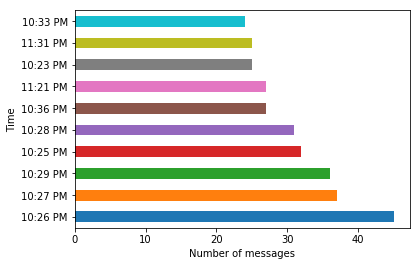

In [40]:
messages_df['Time'].value_counts().head(10).plot.barh() # Top 10 Times of the day at which the most number of messages were sent
plt.xlabel('Number of messages')
plt.ylabel('Time')

### **The most happening day was -**

2021-05-03    1622
2021-05-04    1000
2021-05-01     364
2021-04-27     137
2021-04-30     130
2021-04-28     113
2021-04-25     110
2021-04-26      59
2021-04-29      24
2021-05-02      17
Name: Date, dtype: int64


Text(0,0.5,'Date')

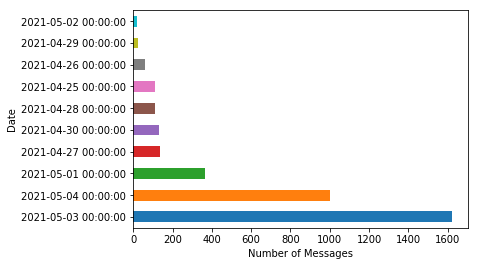

In [41]:
messages_df['Date'].value_counts().head(10).plot.barh()
print(messages_df['Date'].value_counts())
plt.xlabel('Number of Messages')
plt.ylabel('Date')

### **The early bird**

### The Late Owl

### **Message Having Maximum number of words**

In [42]:
messages_df.iloc[messages_df['Word_Count'].argmax()]

S:\AnacodaPy\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.



Date              2021-05-03 00:00:00
Time                          8:57 PM
Author                +91 88306 65866
Message          this group rocks 🔥🔥🔥
emoji                       [🔥, 🔥, 🔥]
urlcount                            0
Letter_Count                       21
Word_Count                          5
MessageCount                        1
emojicount                          3
Name: 1527, dtype: object

### **Word Cloud**

In [43]:
text = ""
for review in messages_df.Message:
    sen = review.split()
#     print(sen)
    for word in sen:
        if len(word) > 2:
            text = text + " " + word


# text = " ".join(review.lower() for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))

There are 79948 words in all the messages.


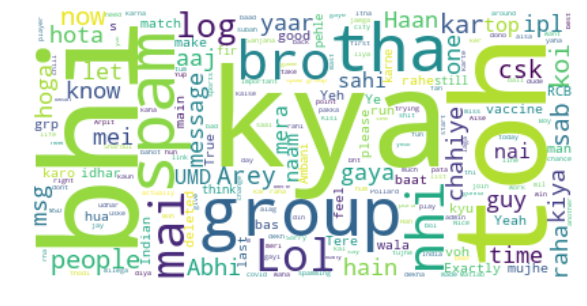

In [44]:
  stopwords = set(STOPWORDS)
  stopwords.update(["hai","mama","bhai","bahut","kaafi","nahi","hai","kuch","will","liye","ha", "pe", "se", "aur", "mein", "ki", "ah","ha","la","hahaha","ne","le","ni","lo","Ma","Haa","ni"])
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Display the generated image:
  # the matplotlib way:
  
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

###**Author Wise Wordcloud**

Author name +91 82481 47548


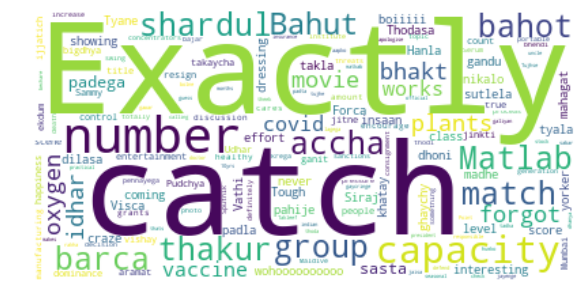

Author name +91 91670 78959


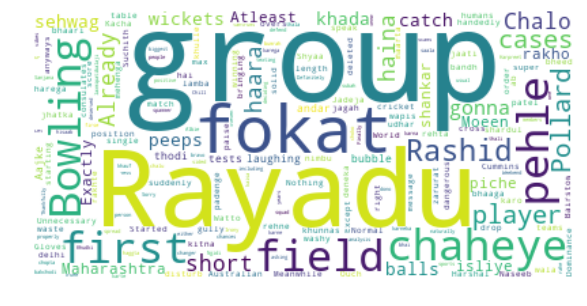

Author name +91 77382 45193


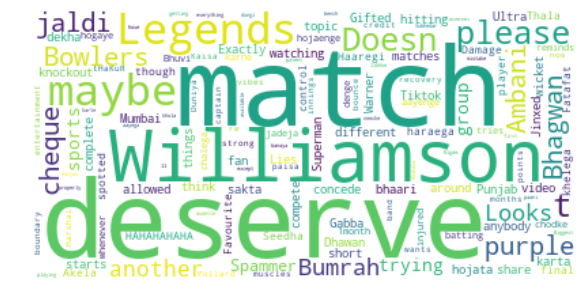

Author name +91 97914 45413


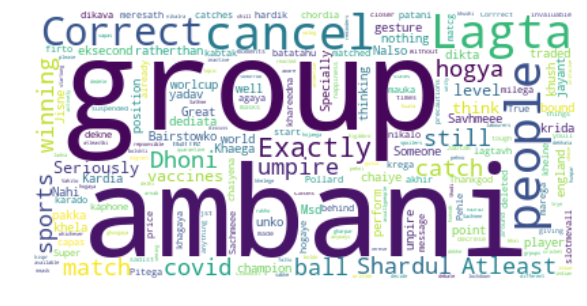

Author name Anuja MSIS


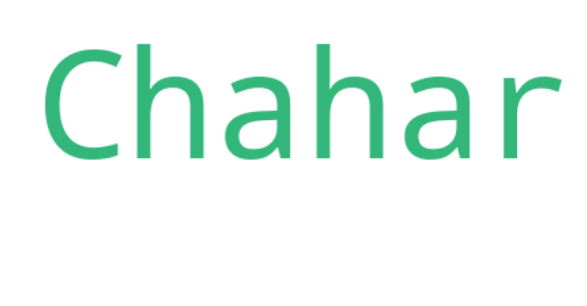

Author name +91 78742 67772


ValueError: We need at least 1 word to plot a word cloud, got 0.

In [45]:
l = messages_df.Author.unique()
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = ""
  for review in dummy_df.Message:
    sen = review.split()
#     print(sen)
    for word in sen:
        if len(word) > 4:
            text = text + " " + word

#   text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  stopwords.update(["ra", "ga", "na", "ani", "em", "ki", "ah","ha","anta","kuda","ante","la","eh","Nen","ne","haa","Haa","le"])
  # Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Display the generated image:
  # the matplotlib way:
  
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()